PRACTICAL –KNN & NAÏVE BAYES
PRACTICAL-MACHINE LEARNING -KNN & NAÏVE BAYES ALGORITHMS ON WINE OR HUMAN ACTIVITY DATASET

Instructions: 
    - Apply KNN & Naïve Bayes algorithms for wine or human activity dataset.
    - Attach screenshot & code of model training and confusion matrix as evidence for the submission. 
    - You can use either Python or R programming

In [2]:
# Load the dataset and display the first few rows
import pandas as pd

In [3]:
# Read the CSV file
wine_df = pd.read_csv(r'C:\Users\User\Desktop\WQD 7012 Apllied Machine Learning\Week 4\Wine_Quality_Data.csv')

In [4]:
# Read the CSV file
wine_df = pd.read_csv('Wine_Quality_Data.csv')

In [5]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(wine_df.head())

First 5 rows of the dataset:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1

In [6]:
# Check the shape of the dataset
print("Dataset shape:", wine_df.shape)

Dataset shape: (6497, 13)


In [7]:
# Check data types and missing values
print("Data types and non-null counts:")
print(wine_df.info())

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [8]:
# Check for missing values
print("Missing values in each column:")
print(wine_df.isnull().sum())

Missing values in each column:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


In [9]:
# Summary statistics
print("Summary statistics:")
print(wine_df.describe())

Summary statistics:
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000          

Basically, the dataset contains 13 columns including various chemical properties of wine, quality rating, and color.

In [10]:
# Check the distribution of the target variable (quality)
import matplotlib.pyplot as plt
import seaborn as sns

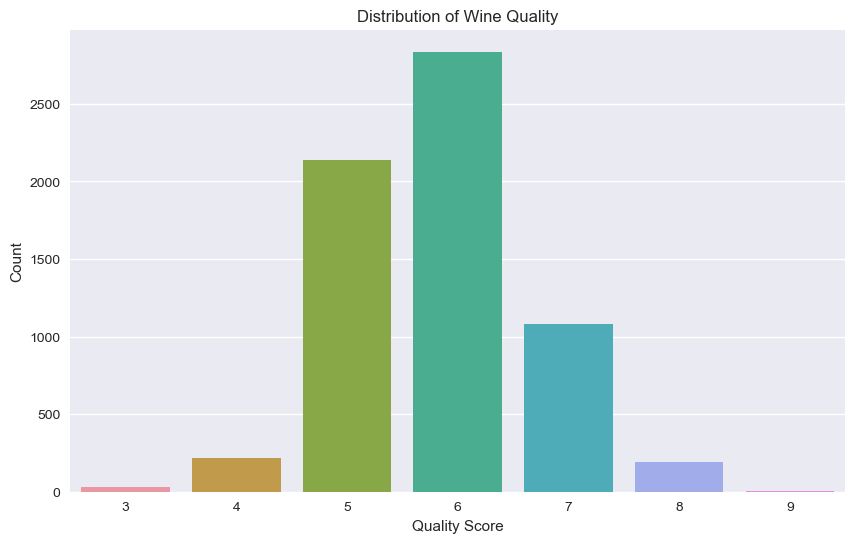

In [11]:
# Set the style for better visualization
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

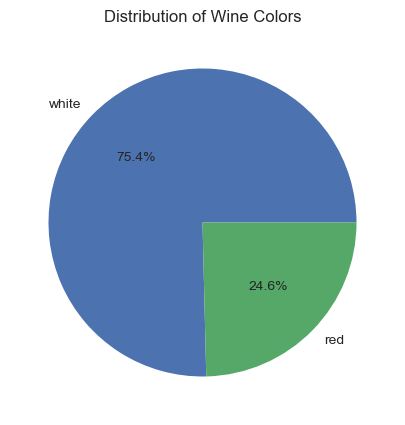

In [12]:
# Check the distribution of wine colors
plt.figure(figsize=(8, 5))
wine_df['color'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Wine Colors')
plt.ylabel('')
plt.show()

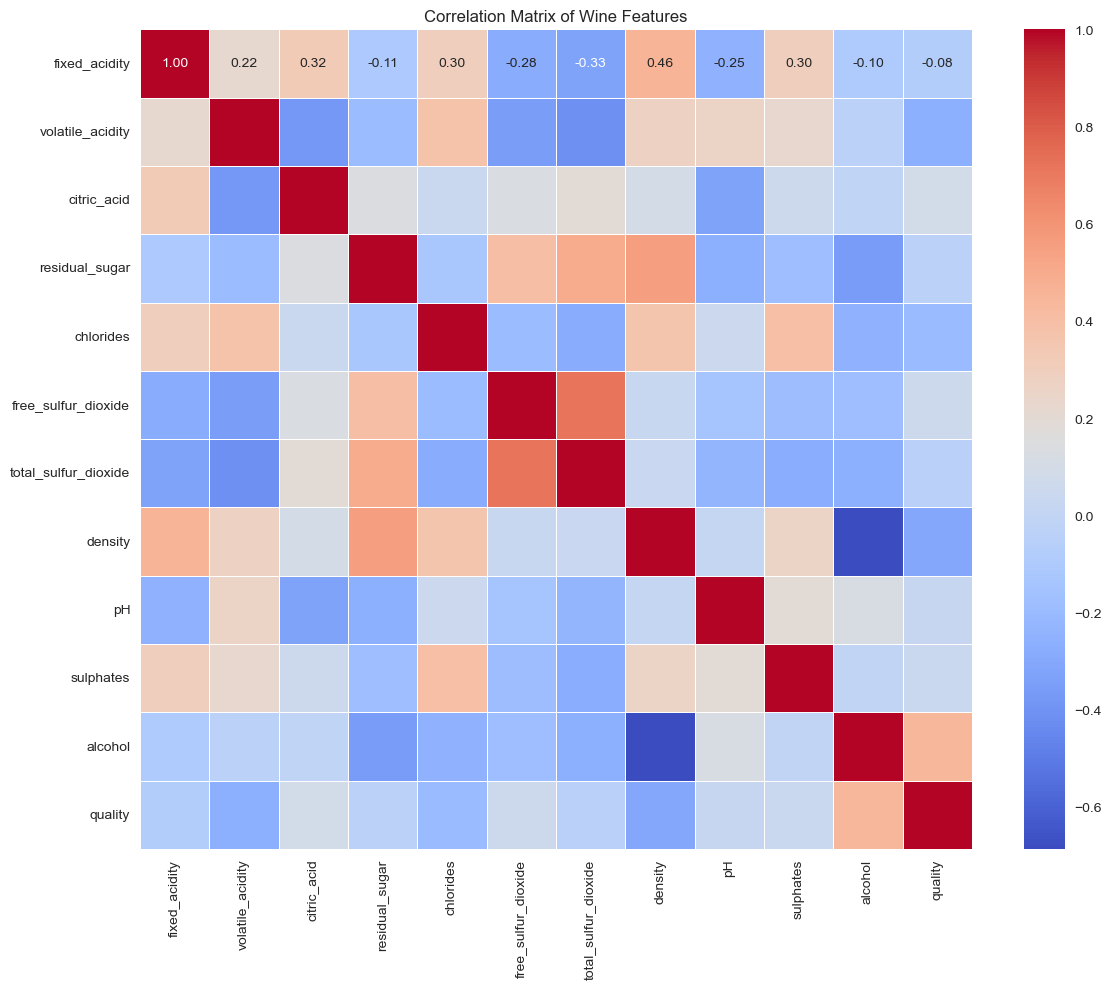

In [13]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = wine_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Wine Features')
plt.tight_layout()
plt.show()

In [14]:
print("Done with initial EDA visualizations")

Done with initial EDA visualizations


In [15]:
# More detailed EDA - Feature distributions by wine color
import numpy as np

In [16]:
# Select numerical features
numerical_features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 
                      'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 
                      'density', 'pH', 'sulphates', 'alcohol']

In [17]:
# Create a figure with subplots for each feature
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

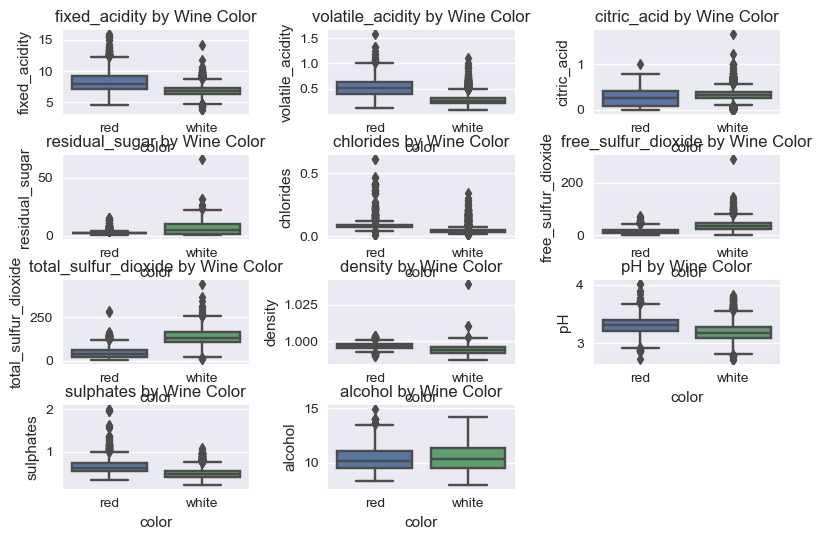

In [18]:
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='color', y=feature, data=wine_df)
    plt.title(f'{feature} by Wine Color')
    plt.tight_layout()

plt.subplots_adjust(hspace=0.5)
plt.show()

In [19]:
# Check for outliers using IQR method for a few key features
print("Checking for outliers in key features:")
for feature in ['alcohol', 'sulphates', 'residual_sugar', 'chlorides']:
    Q1 = wine_df[feature].quantile(0.25)
    Q3 = wine_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((wine_df[feature] < lower_bound) | (wine_df[feature] > upper_bound)).sum()
    print(f"{feature}: {outliers} outliers detected ({outliers/len(wine_df)*100:.2f}% of data)")

Checking for outliers in key features:
alcohol: 3 outliers detected (0.05% of data)
sulphates: 191 outliers detected (2.94% of data)
residual_sugar: 118 outliers detected (1.82% of data)
chlorides: 286 outliers detected (4.40% of data)


In [20]:
print("Done with detailed EDA")

Done with detailed EDA


The code visualized feature distributions by wine color using boxplots and checked for outliers in key features using the IQR method.

In [21]:
# Preprocessing the data for modeling

# 1. Convert categorical variable 'color' to numerical using one-hot encoding
wine_df_encoded = pd.get_dummies(wine_df, columns=['color'], drop_first=True)
print("After one-hot encoding:")
print(wine_df_encoded.head())

After one-hot encoding:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  color_white  
0      9.4        5        

In [22]:
# 2. Feature scaling - standardize numerical features
from sklearn.preprocessing import StandardScaler

In [23]:
# Define features and target
X = wine_df_encoded.drop('quality', axis=1)
y = wine_df_encoded['quality']

In [24]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Convert back to DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("After standardization (first 5 rows):")
print(X_scaled_df.head())


After standardization (first 5 rows):
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol  color

In [26]:
# 3. Check the distribution of the target variable
print("Target variable (quality) distribution:")
print(y.value_counts().sort_index())

Target variable (quality) distribution:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


In [27]:
# 4. Convert the problem to binary classification for simplicity
# Let's define quality > 6 as 'good' wine and <= 6 as 'not good'
y_binary = (y > 6).astype(int)
print("\
Binary target distribution (1: good wine, 0: not good wine):")
print(y_binary.value_counts())

Binary target distribution (1: good wine, 0: not good wine):
quality
0    5220
1    1277
Name: count, dtype: int64


In [28]:
# Save preprocessed data for modeling
from sklearn.model_selection import train_test_split

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_binary, test_size=0.25, random_state=42, stratify=y_binary
)

In [30]:
print("Data split into training and testing sets:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Data split into training and testing sets:
Training set: 4872 samples
Testing set: 1625 samples


The code preprocesses wine quality data by encoding categorical variables, standardizing numerical features, converting the target variable to binary classification, and splitting the dataset into training and testing sets.

In [31]:
# Implementing KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [32]:
# Find the optimal K value
k_values = list(range(1, 21))
train_accuracy = []
test_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Training accuracy
    train_pred = knn.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, train_pred))
    
    # Testing accuracy
    test_pred = knn.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, test_pred))

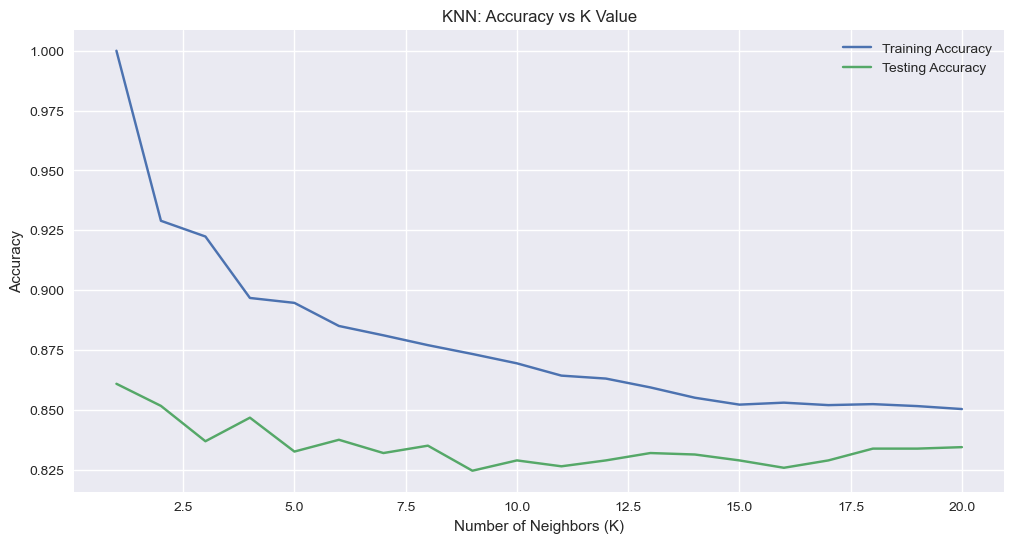

In [33]:
# Plot the accuracy for different K values
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs K Value')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Find the optimal K value
optimal_k = k_values[test_accuracy.index(max(test_accuracy))]
print(f"Optimal K value: {optimal_k}")

Optimal K value: 1


In [35]:
# Train the KNN model with the optimal K value
start_time = time.time()
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
knn_train_time = time.time() - start_time

In [36]:
# Make predictions
start_time = time.time()
y_pred_knn = knn_optimal.predict(X_test)
knn_predict_time = time.time() - start_time

In [37]:
# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)

In [38]:
print(f"KNN Model Performance (K={optimal_k}):")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Training time: {knn_train_time:.4f} seconds")
print(f"Prediction time: {knn_predict_time:.4f} seconds")

KNN Model Performance (K=1):
Accuracy: 0.8609
Training time: 0.0229 seconds
Prediction time: 0.2031 seconds


In [39]:
print("Confusion Matrix:")
print(knn_conf_matrix)

print("Classification Report:")
print(knn_report)

Confusion Matrix:
[[1197  109]
 [ 117  202]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1306
           1       0.65      0.63      0.64       319

    accuracy                           0.86      1625
   macro avg       0.78      0.77      0.78      1625
weighted avg       0.86      0.86      0.86      1625



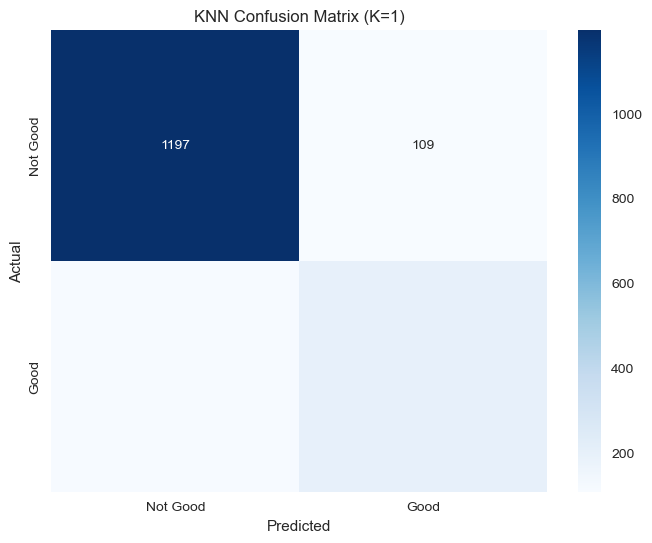

In [40]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Good', 'Good'], 
            yticklabels=['Not Good', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'KNN Confusion Matrix (K={optimal_k})')
plt.show()

This code implements the K-Nearest Neighbors algorithm, finds the optimal K value, trains the model, makes predictions, and evaluates its performance using accuracy, confusion matrix, and classification report.

In [41]:
# Implementing Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
import time

In [42]:
# Train the Naive Bayes model
start_time = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_train_time = time.time() - start_time

In [43]:
# Make predictions
start_time = time.time()
y_pred_nb = nb_model.predict(X_test)
nb_predict_time = time.time() - start_time

In [44]:
# Evaluate the model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)
nb_report = classification_report(y_test, y_pred_nb)

In [45]:
print("Naive Bayes Model Performance:")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Training time: {nb_train_time:.4f} seconds")
print(f"Prediction time: {nb_predict_time:.4f} seconds")

Naive Bayes Model Performance:
Accuracy: 0.7495
Training time: 0.0050 seconds
Prediction time: 0.0013 seconds


In [46]:
print("Confusion Matrix:")
print(nb_conf_matrix)

print("Classification Report:")
print(nb_report)

Confusion Matrix:
[[1014  292]
 [ 115  204]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1306
           1       0.41      0.64      0.50       319

    accuracy                           0.75      1625
   macro avg       0.65      0.71      0.67      1625
weighted avg       0.80      0.75      0.77      1625



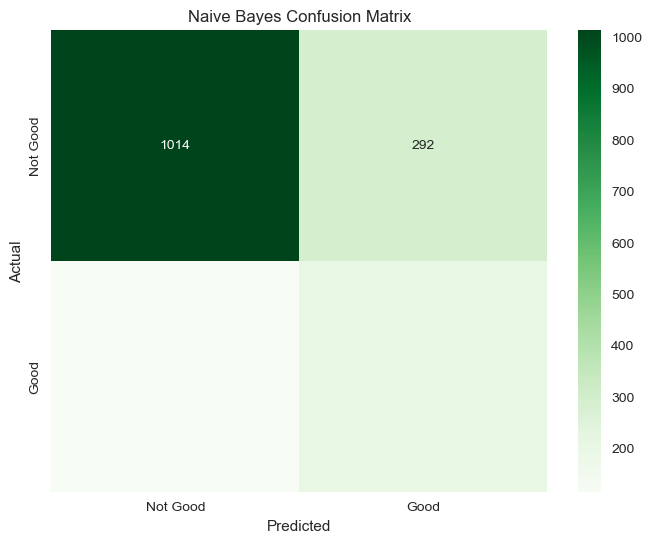

In [47]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Not Good', 'Good'], 
            yticklabels=['Not Good', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [48]:
# Compare KNN and Naive Bayes
models = ['KNN', 'Naive Bayes']
accuracy = [knn_accuracy, nb_accuracy]
training_time = [knn_train_time, nb_train_time]
prediction_time = [knn_predict_time, nb_predict_time]

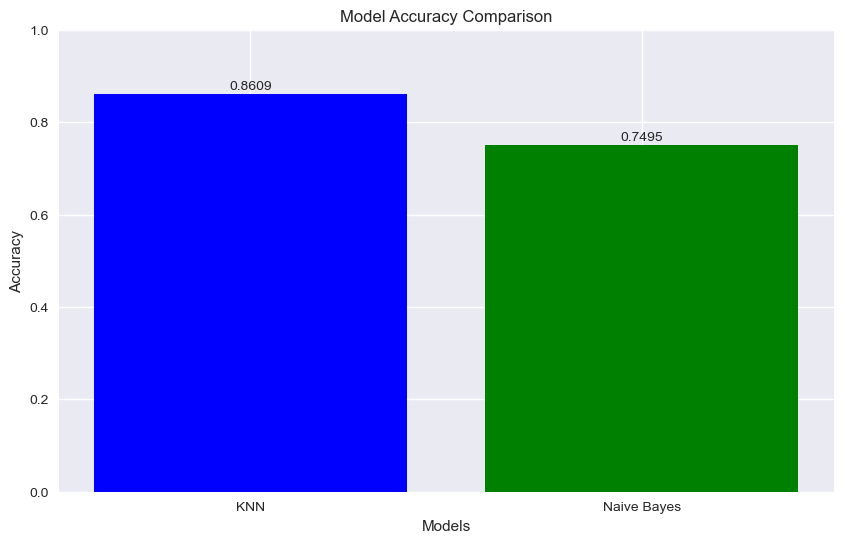

In [49]:
# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'green'])
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()

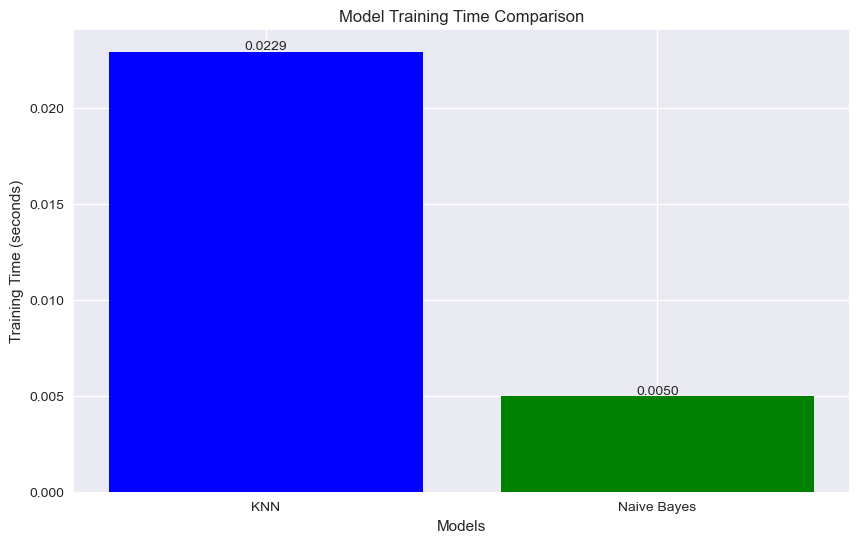

In [50]:
# Plot training time comparison
plt.figure(figsize=(10, 6))
plt.bar(models, training_time, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')
plt.title('Model Training Time Comparison')
for i, v in enumerate(training_time):
    plt.text(i, v + 0.0001, f"{v:.4f}", ha='center')
plt.show()

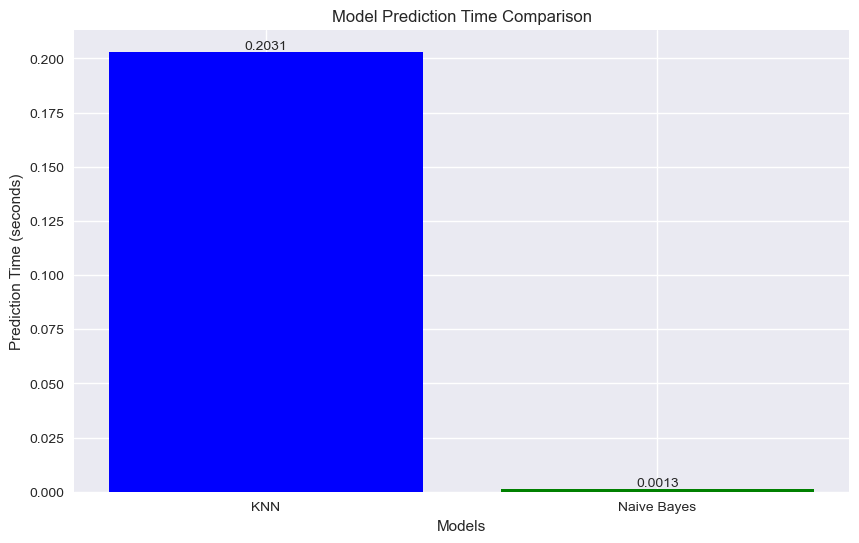

In [51]:
# Plot prediction time comparison
plt.figure(figsize=(10, 6))
plt.bar(models, prediction_time, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Prediction Time (seconds)')
plt.title('Model Prediction Time Comparison')
for i, v in enumerate(prediction_time):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center')
plt.show()